# Make shapefile out of polygons that ran

This notebook checks whether the wetland polygon drill ran on all the polygons in the input shapefile.

_inputs_  
- a csv saved from the QGIS attribute table of the original shapefile
- path to the output directory containing results for each shapefile
- somewhere to save the output shapefile

load some modules

In [1]:
import xarray as xr
import pandas as pd
import csv
import os
import fiona
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

where is my csv?

In [47]:
path_to_csv_attribute_table = '/g/data/r78/rjd547/DES-QLD_Project/data/Wet_WGS84_L_attrs.csv'
#path_to_csv_attribute_table = '/g/data/r78/rjd547/DES-QLD_Project/data/Wet_WGS84_L_attrs.csv'
path_to_shapefile = '/g/data/r78/rjd547/DES-QLD_Project/data/Wet_WGS84_L.shp'

read in the csv using pandas

In [6]:
starting_polys = pd.read_csv(path_to_csv_attribute_table)

## make a list of the files that ran

In [7]:
polys_run = []
#for each file in the output directory
for file in os.listdir('/g/data/r78/rjd547/DES-QLD_Project/lac_1/'):
    #if it's a csv file
    if file.endswith(".csv"):
        #add it to our list
        polys_run.append(file)  

## Get the polyName by removing the file extension

In [83]:
#get list of runs
run_list = []
for i in polys_run:
    i = i.split('.') #break up filename
    i = i[0] #get first bit
    run_list.append(i)

## How many wetlands did it run for?

In [85]:
len(run_list)

7637

## How many wetlands didn't it run for?

In [86]:
len(starting_polys)-len(run_list)

7722

### this is the function used in the WIT to get the shapefile name. if we apply this to our input shapefile, we can retrieve the list of polygons that the code should have run for.

In [101]:
def get_polyName(feature):
    'function for QLD shapefile types'
    ID = feature['properties']['OBJECTID']
    CATCHMENT = feature['properties']['CATCHMENT']
    HAB = feature['properties']['HAB']
    polyName = f'{ID}_{CATCHMENT}_{HAB}'
    #print(f'processing polygon {polyName}')
    return(polyName)

In [95]:
in_polys_list=[]
with fiona.open(path_to_shapefile) as starting_shapefile:
    for shapes in starting_shapefile:   
        #print(shapes['properties'])
        polyName=get_polyName(shapes)
        in_polys_list.append(polyName)

In [96]:
len(in_polys_list)

15359

In [97]:
missing_runs = set(in_polys_list) - set(run_list)

#print(missing_runs)

In [98]:
#turn the set of missing runs back into a list
missing_runs = list(missing_runs)

In [99]:
len(missing_runs)

7722

In [100]:
missing_runs[0:5]

['47503_DAWSON_RIVER_6',
 '43281_COMET_RIVER_40',
 '22836_EYRE_CREEK_16a',
 '57575_NOGOA_RIVER_40',
 '24252_EYRE_CREEK_16a']

open the original shapefile. Use the index ['id'] of the missing runs to select the polygons from the shapefile. Write the selected missing polygons out into a new shapefile.

In [107]:
with fiona.open(path_to_shapefile) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/DES-QLD_Project/Lac_notrun_v1.shp','w',**meta) as outshape:
        for feature in inshape:
            ID = feature['properties']['OBJECTID']
            CATCHMENT = feature['properties']['CATCHMENT']
            HAB = feature['properties']['HAB']
            polyName = f'{ID}_{CATCHMENT}_{HAB}'
            print(polyName)
            if polyName in missing_runs:
                #print(feature['properties']['OBJECTID'])   
                outshape.write(feature)        

49237_FITZROY_RIVER_40
49238_FITZROY_RIVER_40
49239_FITZROY_RIVER_40
49416_LOWER_MARY_RIVER_40
768_DIAMANTINA_RIVER_16a
769_DIAMANTINA_RIVER_16a
770_DIAMANTINA_RIVER_15
771_DIAMANTINA_RIVER_15
772_DIAMANTINA_RIVER_15
773_DIAMANTINA_RIVER_15
774_DIAMANTINA_RIVER_15
775_DIAMANTINA_RIVER_15
776_DIAMANTINA_RIVER_15
777_DIAMANTINA_RIVER_15
778_DIAMANTINA_RIVER_15
779_DIAMANTINA_RIVER_15
780_DIAMANTINA_RIVER_15
781_DIAMANTINA_RIVER_15
782_DIAMANTINA_RIVER_15
783_DIAMANTINA_RIVER_15
784_DIAMANTINA_RIVER_15
785_DIAMANTINA_RIVER_15
786_DIAMANTINA_RIVER_15
787_DIAMANTINA_RIVER_15
788_DIAMANTINA_RIVER_15
789_DIAMANTINA_RIVER_15
790_DIAMANTINA_RIVER_15
791_DIAMANTINA_RIVER_15
792_DIAMANTINA_RIVER_15
793_DIAMANTINA_RIVER_15
794_DIAMANTINA_RIVER_15
795_DIAMANTINA_RIVER_15
796_DIAMANTINA_RIVER_15
797_DIAMANTINA_RIVER_15
798_DIAMANTINA_RIVER_15
799_DIAMANTINA_RIVER_15
800_DIAMANTINA_RIVER_15
801_DIAMANTINA_RIVER_16a
802_DIAMANTINA_RIVER_16a
803_DIAMANTINA_RIVER_16a
804_DIAMANTINA_RIVER_16a
805_DIAMANT

open the original shapefile. Use the index ['id'] of the runs to select the polygons from the shapefile. Write the selected missing polygons out into a new shapefile.

In [109]:
run_list[0:10]

['20017_EYRE_CREEK_16a',
 '18867_EYRE_CREEK_16a',
 '19873_EYRE_CREEK_16a',
 '2967_DIAMANTINA_RIVER_16a',
 '19761_EYRE_CREEK_16a',
 '2658_DIAMANTINA_RIVER_16a',
 '4395_DIAMANTINA_RIVER_15',
 '2191_DIAMANTINA_RIVER_16a',
 '2098_DIAMANTINA_RIVER_16a',
 '1458_DIAMANTINA_RIVER_16a']

In [110]:
#this time we just create a json file of the actual runs
with fiona.open(path_to_shapefile) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/DES-QLD_Project/Lac_run_v1.shp','w',**meta) as outshape:
        for feature in inshape:
            ID = feature['properties']['OBJECTID']
            CATCHMENT = feature['properties']['CATCHMENT']
            HAB = feature['properties']['HAB']
            polyName = f'{ID}_{CATCHMENT}_{HAB}'
            if polyName in run_list:
                print(polyName)   
                outshape.write(feature)            

49237_FITZROY_RIVER_40
49238_FITZROY_RIVER_40
49239_FITZROY_RIVER_40
49416_LOWER_MARY_RIVER_40
768_DIAMANTINA_RIVER_16a
769_DIAMANTINA_RIVER_16a
770_DIAMANTINA_RIVER_15
771_DIAMANTINA_RIVER_15
772_DIAMANTINA_RIVER_15
773_DIAMANTINA_RIVER_15
774_DIAMANTINA_RIVER_15
775_DIAMANTINA_RIVER_15
776_DIAMANTINA_RIVER_15
777_DIAMANTINA_RIVER_15
778_DIAMANTINA_RIVER_15
779_DIAMANTINA_RIVER_15
780_DIAMANTINA_RIVER_15
781_DIAMANTINA_RIVER_15
782_DIAMANTINA_RIVER_15
783_DIAMANTINA_RIVER_15
784_DIAMANTINA_RIVER_15
785_DIAMANTINA_RIVER_15
786_DIAMANTINA_RIVER_15
787_DIAMANTINA_RIVER_15
788_DIAMANTINA_RIVER_15
789_DIAMANTINA_RIVER_15
790_DIAMANTINA_RIVER_15
791_DIAMANTINA_RIVER_15
792_DIAMANTINA_RIVER_15
793_DIAMANTINA_RIVER_15
794_DIAMANTINA_RIVER_15
795_DIAMANTINA_RIVER_15
796_DIAMANTINA_RIVER_15
797_DIAMANTINA_RIVER_15
798_DIAMANTINA_RIVER_15
799_DIAMANTINA_RIVER_15
800_DIAMANTINA_RIVER_15
801_DIAMANTINA_RIVER_16a
802_DIAMANTINA_RIVER_16a
803_DIAMANTINA_RIVER_16a
804_DIAMANTINA_RIVER_16a
805_DIAMANT

open the new shapefile to check what was written out as a new shapefile.

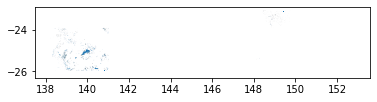

In [111]:
outshape_written = gpd.read_file('/g/data/r78/rjd547/DES-QLD_Project/Lac_run_v1.shp')
outshape_written.plot()
plt.show()